# Práctica APA - Evaluación preliminar del problema

## Aplicación del Aprendizaje Automático en la detección de pacientes con Hipotiroidismo

### Autores

* Pol Casacuberta Gil
* Marta Granero i Martí

### Elección del conjunto de datos

El objetivo de este informe es exponer de forma breve qué tema hemos escogido juntamente con un leve análisis del Dataset asociado al problema que hemos escogido para llevar a cargo la práctica.

El dataset a este problema se puede consultar en [OpenML (Open Machine Learning)](https://www.openml.org/search?type=data&status=any&id=1000), una plataforma abierta dónde se encuentran varios conjuntos de datos.

Para poder usar este Dataset, hemos comprobado debidamente que no se ha hecho ya un análisis a este problema usando el mismo, buscando notebooks existentes en [Kaggle](https://www.kaggle.com). 

Solamente hemos encontrado [4 notebooks](https://www.kaggle.com/datasets/kumar012/hypothyroid/code) donde se intenta resolver este problema aunque usando un Dataset distinto. Estos usan un conjunto de datos que cuenta con 26 columnas a diferencia de las 30 del Dataset que hemos escogido y carecen de las columnas que sí que se incluyen en el nuestro, como son: 
- **hypopituitary** - toma valores: f, t
- **psych** - toma valores: f, t
- **referral source** - toma valores: SVHC,other,SVI,STMW,SVHD
- **binaryClass** - variable respuesta que toma valores: P si es positivo, o N en otro caso

Además hemos comprobado que satisfaga todas las condiciones que se exigen, como siguen:

* El conjunto de datos tiene variables numéricas y categóricas
* El conjunto de datos no se ha generado sintéticamente
* El conjunto de datos tiene 30 variables(en estas se incluye la variable respuesta).
* Creemos que tenemos suficiente información sobre el problema para entender y analizar los resultados.
* El dataset no está preprocesado ya que cuenta con valores Nan i con valores faltantes en la mayoria de muestras del conjunto de datos.
* El conjunto de datos contiene más de 3772 muestras.
* El problema es lo suficientemente complejo ya que no hemos obtenido un acierto bueno usando naive bayes ni tampoco una R2 casi perfecta

#### Descripción del conjunto de datos

* Descripción del conjunto de datos

Imagino que hem de donar una breu descripció dels atributs

#### Variable respuesta

Trataremos con un problema de clasificación binária dónde la variable respuesta será: **binaryClass**. Ésta toma valores categóricos: (P,N) en función de sí un paciente es positivo en Hipotiroidismo(P), o N si este no lo es.

#### Problemas específicos de los datos

* como atributos relacionados con el tiempo y desbalance entre clases.

### Descripción del problema

En esta práctica desarrollaremos varios modelos de clasificación usando distintos algoritmos de ML para resolver el problema real de detección de pacientes con Hipotiroidismo.

#### Carga de los datos

##### Librerías necesarias

In [1]:
from scipy.io import arff
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [2]:
data = arff.loadarff('hypothyroid.arff')
df = pd.DataFrame(data[0])

df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',125.0,b't',1.14,b't',109.0,b'f',NaN,b'SVHC',b'P'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',102.0,b'f',NaN,b'f',NaN,b'f',NaN,b'other',b'P'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',109.0,b't',0.91,b't',120.0,b'f',NaN,b'other',b'P'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',175.0,b'f',NaN,b'f',NaN,b'f',NaN,b'other',b'P'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',61.0,b't',0.87,b't',70.0,b'f',NaN,b'SVI',b'P'


In [3]:
#Aplicamos un mini procesamiento del Dataframe

#Primer tratamiento del DataFrame para pasar las columnas de tipo string a formato utf8, ya que sino teníamos b'f'
columnes = df.applymap(lambda col: isinstance(col, bytes)).all(0)
columnes = df.columns[columnes]
df.loc[:, columnes] = df[columnes].applymap(lambda col: col.decode("utf-8", errors='ignore'))

#Cambiamos los valors 'f', 't' por tipos booleanos, False y True resp.
df.replace({'t': 1, 'f': 0}, inplace=True)

df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,P
1,23.0,F,0,0,0,0,0,0,0,0,...,1,102.0,0,NaN,0,NaN,0,NaN,other,P
2,46.0,M,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,P
3,70.0,F,1,0,0,0,0,0,0,0,...,1,175.0,0,NaN,0,NaN,0,NaN,other,P
4,70.0,F,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,P


#### Estadística descriptiva

In [4]:
#Damos un primer vistazo a los datos y vemos que tenemos valors muchos NaN
df.describe(include='all').T

#También tenemos muchos missing values, marcados con '?', p.ej:
df.sex.unique()
df.TBG.unique()
df.TBG.count()

#Reordenamos y ponemos la variable respuesta primero
columnes = list(df.columns)
columnes.remove('binaryClass')
columnes.insert(0, 'binaryClass')
df = df.reindex(columns=columnes)

df.head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3771.0,NaN,NaN,NaN,51.735879,20.084958,1.0,36.0,54.0,67.0,455.0
sex,3772,3,F,2480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on thyroxine,3772.0,NaN,NaN,NaN,0.123012,0.328494,0.0,0.0,0.0,0.0,1.0
query on thyroxine,3772.0,NaN,NaN,NaN,0.013256,0.114382,0.0,0.0,0.0,0.0,1.0
on antithyroid medication,3772.0,NaN,NaN,NaN,0.0114,0.106174,0.0,0.0,0.0,0.0,1.0
sick,3772.0,NaN,NaN,NaN,0.038971,0.193552,0.0,0.0,0.0,0.0,1.0
pregnant,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
thyroid surgery,3772.0,NaN,NaN,NaN,0.014051,0.117716,0.0,0.0,0.0,0.0,1.0
I131 treatment,3772.0,NaN,NaN,NaN,0.015642,0.124101,0.0,0.0,0.0,0.0,1.0
query hypothyroid,3772.0,NaN,NaN,NaN,0.062036,0.241253,0.0,0.0,0.0,0.0,1.0


array(['F', 'M', '?'], dtype=object)

array([nan])

0

,binaryClass,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source
0,P,41.0,F,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,NaN,SVHC
1,P,23.0,F,0,0,0,0,0,0,0,...,2.0,1,102.0,0,NaN,0,NaN,0,NaN,other
2,P,46.0,M,0,0,0,0,0,0,0,...,NaN,1,109.0,1,0.91,1,120.0,0,NaN,other
3,P,70.0,F,1,0,0,0,0,0,0,...,1.9,1,175.0,0,NaN,0,NaN,0,NaN,other
4,P,70.0,F,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,NaN,SVI


#### Visualización básica

NormaltestResult(statistic=2297.2359679721785, pvalue=0.0)
NormaltestResult(statistic=1281.283371012964, pvalue=5.927220820727865e-279)


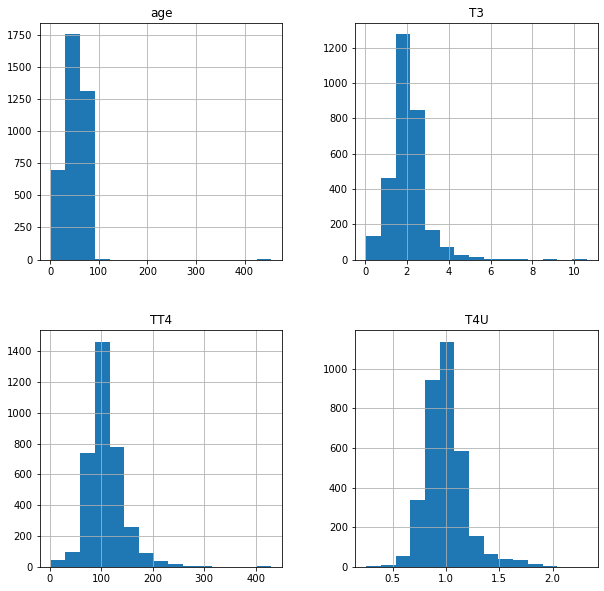

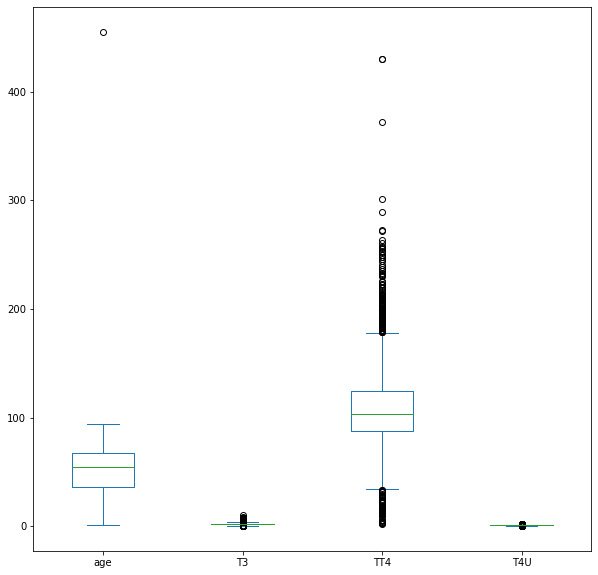

In [5]:
#Visualizamos algunos atributos
df.loc[:,['age', 'T3', 'TT4', 'T4U']].hist(bins=15, figsize=(10,10));

#Comprobamos si las variables numéricas siguen una distribución Normal.
print(normaltest(df['age'], nan_policy='omit'))
print(normaltest(df['T3'], nan_policy='omit'))


df.loc[:,['age', 'T3', 'TT4', 'T4U']].plot.box(figsize=(10,10));

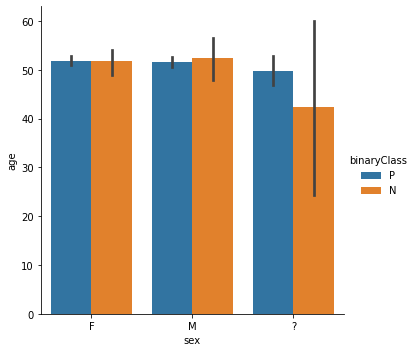

In [6]:
grafic = sns.catplot(data=df, kind="bar", x="sex", y="age", hue="binaryClass")

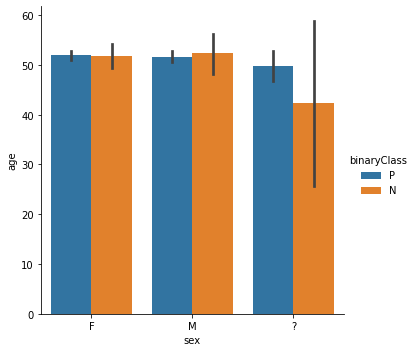

In [7]:
grafic3 = sns.catplot(data=df, kind="bar", x="sex", y="age", hue="binaryClass")

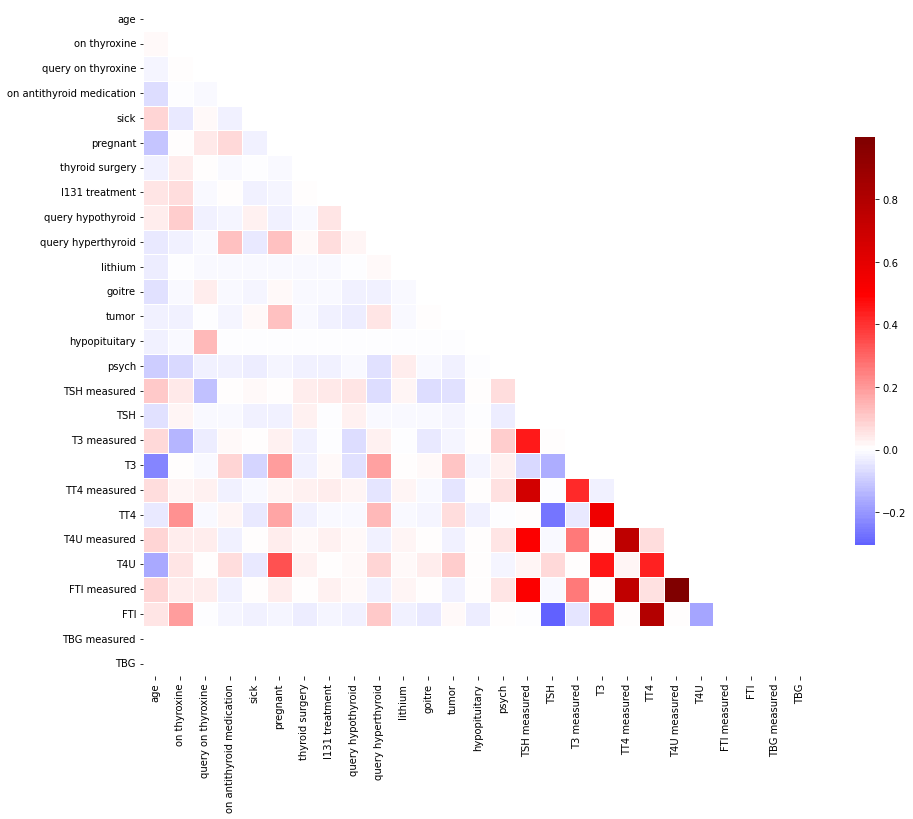

In [8]:
#Correlación entre distintas variables
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

#### Partición del Dataset

In [9]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train.shape, df_test.shape

((3017, 30), (755, 30))

#### Preprocesamiento del Dataset

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017 entries, 2661 to 3174
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3017 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3017 non-null   object 
 3   on thyroxine               3017 non-null   int64  
 4   query on thyroxine         3017 non-null   int64  
 5   on antithyroid medication  3017 non-null   int64  
 6   sick                       3017 non-null   int64  
 7   pregnant                   3017 non-null   int64  
 8   thyroid surgery            3017 non-null   int64  
 9   I131 treatment             3017 non-null   int64  
 10  query hypothyroid          3017 non-null   int64  
 11  query hyperthyroid         3017 non-null   int64  
 12  lithium                    3017 non-null   int64  
 13  goitre                     3017 non-null   in

In [11]:
#Contamos cuantos valores perdidos con NaN tenemos:
df_train.isna().sum()

binaryClass                     0
age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           297
T3 measured                     0
T3                            609
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           310
FTI measured                    0
FTI                           308
TBG measured                    0
TBG                          3017
referral sourc

<AxesSubplot:>

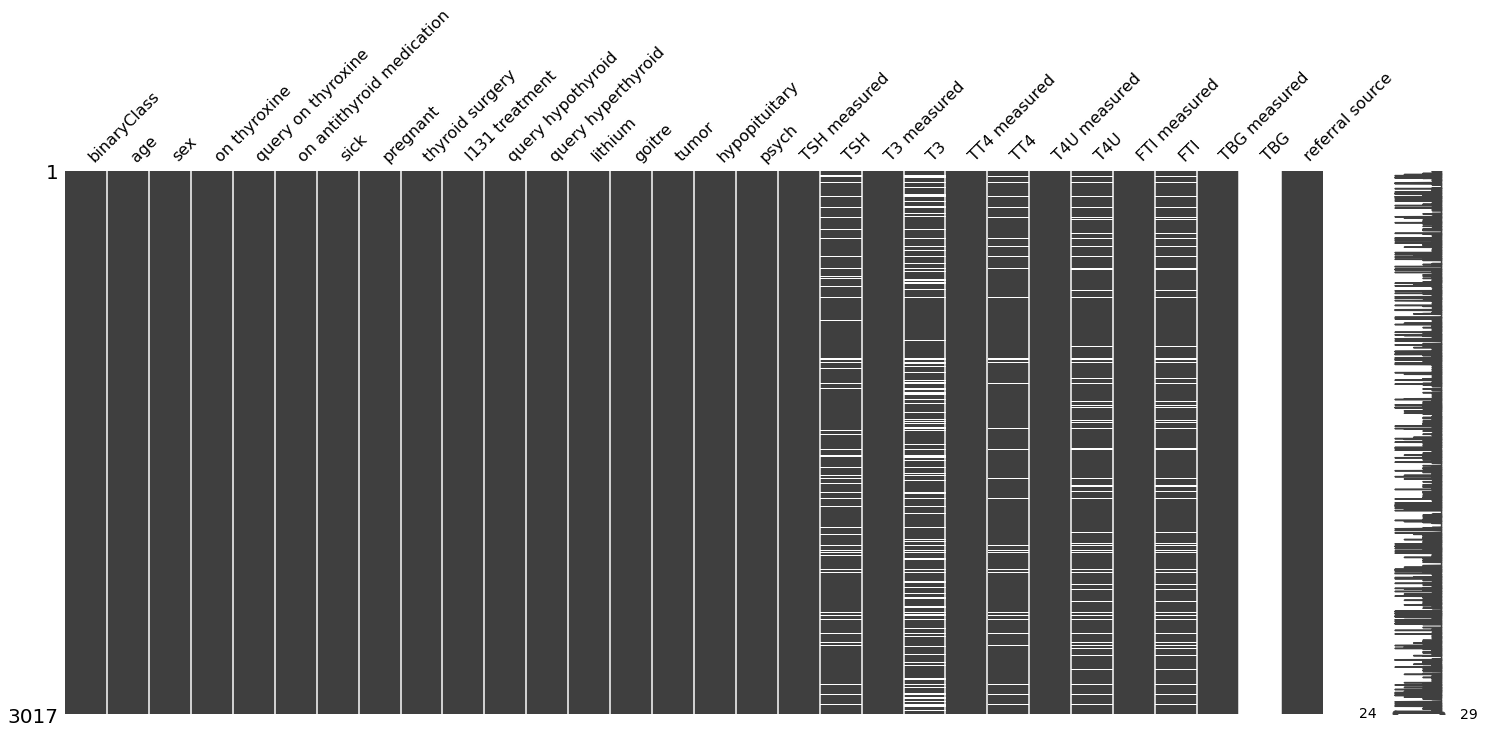

In [12]:
msno.matrix(df_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

/var/folders/s1/h3mlm3qx719csw5jbkn6fcbh0000gn/T/ipykernel_2257/4233790963.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[~(small_outliers | big_outliers)].boxplot(column='age',ax=axes[0]);
/var/folders/s1/h3mlm3qx719csw5jbkn6fcbh0000gn/T/ipykernel_2257/4233790963.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[~(small_outliers | big_outliers)]['age'].plot.kde().set_xlim(left=-10);


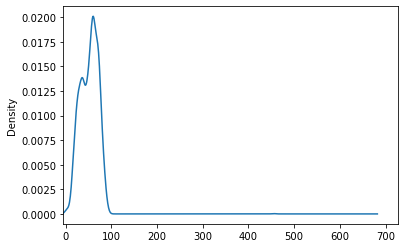

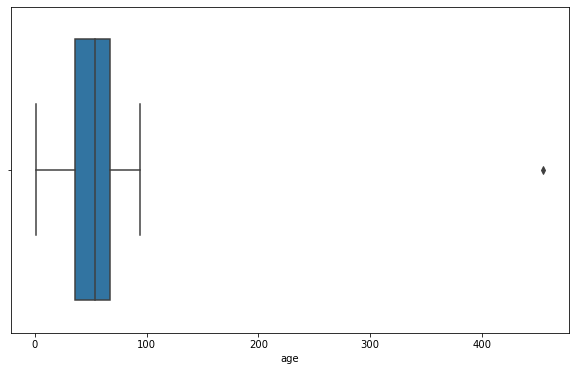

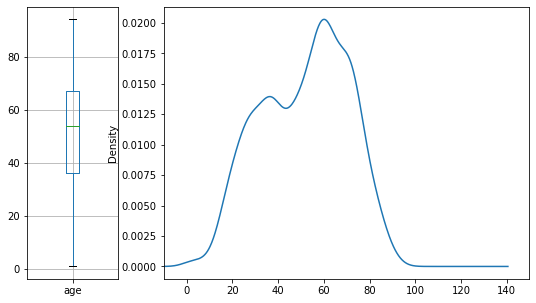

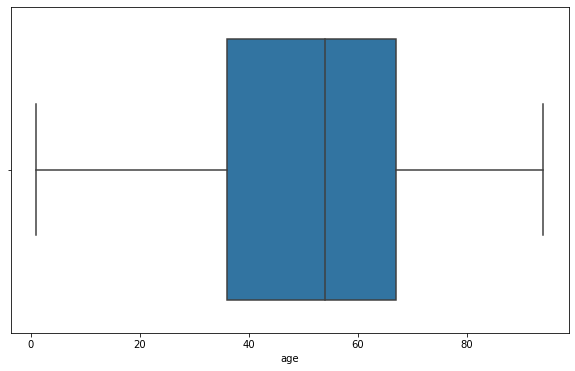

In [13]:
#Hemos de tratar los atributos:binaryClass, age, sex, TSH, T3, T4U, TT4, FTI, TBG y referral source

#age
df_train['age'].plot.kde().set_xlim(left=-5)
df_train['age'].mean()
df_train['age'].std()

df_train['age'].fillna(value=df_train['age'].mean(), inplace=True)

#outlier detectado en la columna de age, quitamos la fila del outlier:
plt.figure(figsize=(10,6));
sns.boxplot(data=df_train, x="age");

Q1 = df_train['age'].quantile(0.25)
Q3 = df_train['age'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = df_train['age'] < (Q1 - 1.5 * IQR)
big_outliers = df_train['age'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

df_train['age'] [small_outliers | big_outliers].head()
df_train.drop([1364], inplace=True)
df_train.info()

#quitamos los outliers
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
df_train[~(small_outliers | big_outliers)].boxplot(column='age',ax=axes[0]);
df_train[~(small_outliers | big_outliers)]['age'].plot.kde().set_xlim(left=-10);

df_train['age'].mean()
df_train['age'].std()

#Lo hemos quitado exitosamente
plt.figure(figsize=(10,6));
sns.boxplot(data=df_train, x="age");

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [15]:
df_train.isna().sum()

binaryClass                     0
age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           297
T3 measured                     0
T3                            609
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           310
FTI measured                    0
FTI                           308
TBG measured                    0
TBG                          3016
referral sourc

In [16]:
#tratamos la columna TBG
df_train.drop('TBG', inplace=True, axis=1)
df_train.info()
df_train.isna().sum()

#tratamos la columna referral source
df_train.drop('referral source', inplace=True, axis=1)
df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

binaryClass                    0
age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          297
T3 measured                    0
T3                           609
TT4 measured                   0
TT4                          184
T4U measured                   0
T4U                          310
FTI measured                   0
FTI                          308
TBG measured                   0
referral source                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

binaryClass                    0
age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          297
T3 measured                    0
T3                           609
TT4 measured                   0
TT4                          184
T4U measured                   0
T4U                          310
FTI measured                   0
FTI                          308
TBG measured                   0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>,
        <AxesSubplot:title={'center':'on antithyroid medication'}>,
        <AxesSubplot:title={'center':'sick'}>],
       [<AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>,
        <AxesSubplot:title={'center':'query hypothyroid'}>,
        <AxesSubplot:title={'center':'query hyperthyroid'}>],
       [<AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>,
        <AxesSubplot:title={'center':'psych'}>],
       [<AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center':'T3 measured'}>,
        <AxesSubplot:title=

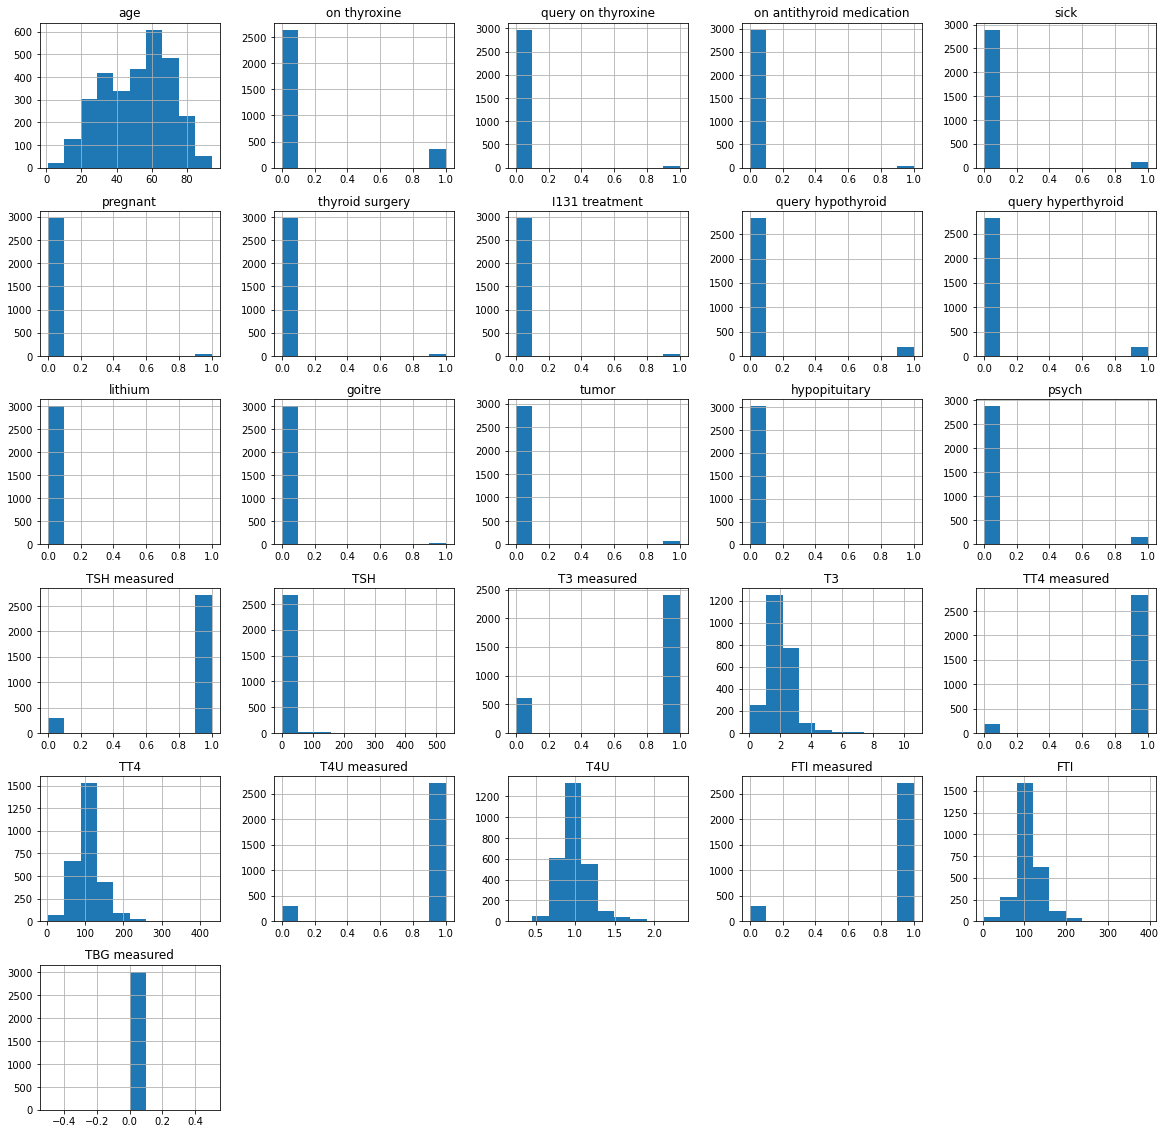

In [17]:
df_train.hist(figsize = (20,20))

In [18]:
df_train.describe()

,age,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,...,2719.000000,3016.000000,2407.000000,3016.000000,2832.000000,3016.000000,2706.000000,3016.000000,2708.000000,3016.0
mean,51.601039,0.121021,0.012931,0.011605,0.039125,0.012931,0.012599,0.015584,0.061008,0.063660,...,5.063284,0.798077,2.013336,0.938992,108.431815,0.897215,0.993996,0.897878,110.629247,0.0
std,18.952459,0.326206,0.112996,0.107116,0.193924,0.112996,0.111556,0.123878,0.239385,0.244188,...,24.526872,0.401502,0.831512,0.239385,35.950941,0.303728,0.192990,0.302859,33.367757,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,3.000000,0.000000,0.250000,0.000000,3.000000,0.0
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.485000,1.000000,1.600000,1.000000,87.750000,1.000000,0.880000,1.000000,93.000000,0.0
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.970000,1.000000,107.000000,0.0
75%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,1.000000,2.300000,1.000000,124.000000,1.000000,1.080000,1.000000,124.000000,0.0
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,0.0


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   object 
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [20]:
#convertimos la variable de 'sex'
df_train['sex'].unique()
df_train['sex'].value_counts()

#La categoria ? nos muestra que no sabemos el sexo del paciente asi que supondremos que es una mujer ya que tenemos un valor para esta categoria mayor
df_train.replace(to_replace='?', inplace=True, value='F')
df_train['sex'] = df_train['sex'].astype('category').cat.codes

df_train['sex'].unique()
df_train['sex'].value_counts()

array(['F', 'M', '?'], dtype=object)

F    1977
M     916
?     123
Name: sex, dtype: int64

array([0, 1], dtype=int8)

0    2100
1     916
Name: sex, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>,
        <AxesSubplot:title={'center':'on antithyroid medication'}>],
       [<AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>,
        <AxesSubplot:title={'center':'query hypothyroid'}>],
       [<AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>],
       [<AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center

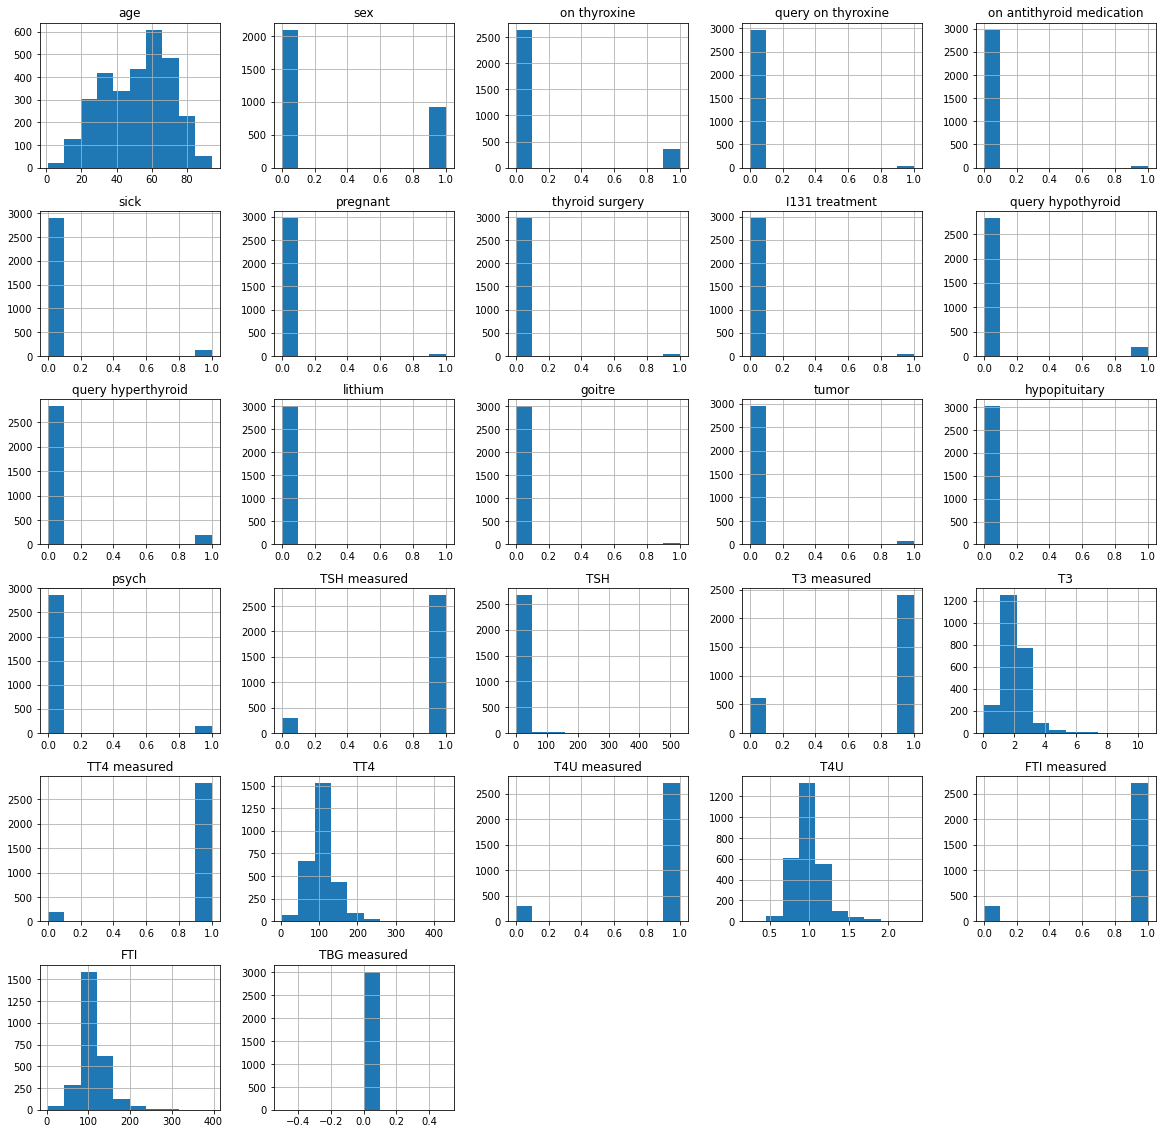

In [21]:
df_train.hist(figsize = (20,20))

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   object 
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   int8   
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [24]:
#convertimos la variable respuesta a binaria
df_train['binaryClass'].unique()
df_train['binaryClass'].value_counts()

df_train['binaryClass'] = df_train['binaryClass'].astype('category').cat.codes

df_train.info()

array([1, 0], dtype=int8)

1    2783
0     233
Name: binaryClass, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 2661 to 3174
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                3016 non-null   int8   
 1   age                        3016 non-null   float64
 2   sex                        3016 non-null   int8   
 3   on thyroxine               3016 non-null   int64  
 4   query on thyroxine         3016 non-null   int64  
 5   on antithyroid medication  3016 non-null   int64  
 6   sick                       3016 non-null   int64  
 7   pregnant                   3016 non-null   int64  
 8   thyroid surgery            3016 non-null   int64  
 9   I131 treatment             3016 non-null   int64  
 10  query hypothyroid          3016 non-null   int64  
 11  query hyperthyroid         3016 non-null   int64  
 12  lithium                    3016 non-null   int64  
 13  goitre                     3016 non-null   in

In [25]:
df_train.describe()

,binaryClass,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,...,2719.000000,3016.000000,2407.000000,3016.000000,2832.000000,3016.000000,2706.000000,3016.000000,2708.000000,3016.0
mean,0.922745,51.601039,0.303714,0.121021,0.012931,0.011605,0.039125,0.012931,0.012599,0.015584,...,5.063284,0.798077,2.013336,0.938992,108.431815,0.897215,0.993996,0.897878,110.629247,0.0
std,0.267039,18.952459,0.459937,0.326206,0.112996,0.107116,0.193924,0.112996,0.111556,0.123878,...,24.526872,0.401502,0.831512,0.239385,35.950941,0.303728,0.192990,0.302859,33.367757,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,3.000000,0.000000,0.250000,0.000000,3.000000,0.0
25%,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.485000,1.000000,1.600000,1.000000,87.750000,1.000000,0.880000,1.000000,93.000000,0.0
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.970000,1.000000,107.000000,0.0
75%,1.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,1.000000,2.300000,1.000000,124.000000,1.000000,1.080000,1.000000,124.000000,0.0
max,1.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,0.0


array([[<AxesSubplot:title={'center':'binaryClass'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>],
       [<AxesSubplot:title={'center':'on antithyroid medication'}>,
        <AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>],
       [<AxesSubplot:title={'center':'query hypothyroid'}>,
        <AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>],
       [<AxesSubplot:title={'center':'hypopituitary'}>,
        <AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title=

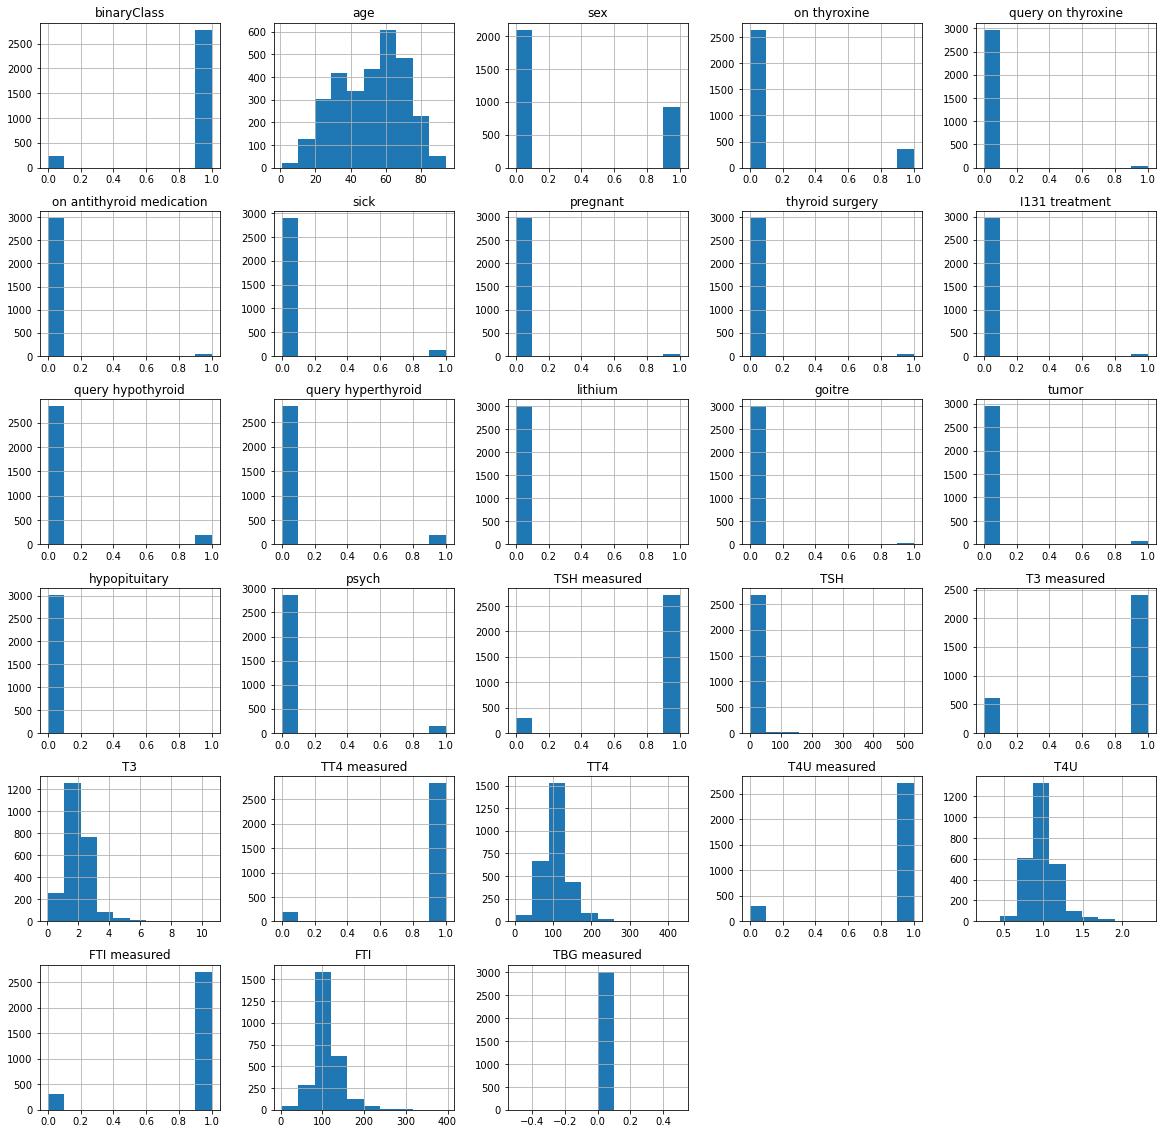

In [27]:
df_train.hist(figsize = (20,20))

In [28]:
#encara ens falta tractar els atributs: TSH, T3, T4U, TT4, FTI, per ara els missing values els inferirem amb la mediana de cadascun d'ells
df_train['TSH'].fillna(value=df_train['TSH'].mean(), inplace = True)
df_train['T3'].fillna(value=df_train['age'].mean(), inplace = True)
df_train['TT4'].fillna(value=df_train['age'].mean(), inplace = True)
df_train['T4U'].fillna(value=df_train['age'].mean(), inplace = True)
df_train['FTI'].fillna(value=df_train['age'].mean(), inplace = True)

In [29]:
#vale ja hem netejat el conjunt d'entrenament
df_train.describe()
df_train.isna().sum()

,binaryClass,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,...,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.0
mean,0.922745,51.601039,0.303714,0.121021,0.012931,0.011605,0.039125,0.012931,0.012599,0.015584,...,5.063284,0.798077,12.026238,0.938992,104.964685,0.897215,6.195649,0.897878,104.601167,0.0
std,0.267039,18.952459,0.459937,0.326206,0.112996,0.107116,0.193924,0.112996,0.111556,0.123878,...,23.287520,0.401502,19.923398,0.239385,37.398838,0.303728,15.371884,0.302859,36.321633,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,3.000000,0.000000,0.250000,0.000000,3.000000,0.0
25%,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600000,1.000000,1.700000,1.000000,84.000000,1.000000,0.890000,1.000000,86.000000,0.0
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,1.000000,2.200000,1.000000,101.000000,1.000000,1.000000,1.000000,104.000000,0.0
75%,1.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.800000,1.000000,3.200000,1.000000,123.000000,1.000000,1.140000,1.000000,122.000000,0.0
max,1.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.000000,51.601039,1.000000,430.000000,1.000000,51.601039,1.000000,395.000000,0.0


#### Preprocesamiento del conjunto de test

In [35]:
df_test.isna().sum()
df_test.info()

binaryClass                    0
age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                           72
T3 measured                    0
T3                           160
TT4 measured                   0
TT4                           47
T4U measured                   0
T4U                           77
FTI measured                   0
FTI                           77
TBG measured                   0
TBG                          755
referral source                0
dtype: int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 270 to 543
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binaryClass                755 non-null    object 
 1   age                        755 non-null    float64
 2   sex                        755 non-null    object 
 3   on thyroxine               755 non-null    int64  
 4   query on thyroxine         755 non-null    int64  
 5   on antithyroid medication  755 non-null    int64  
 6   sick                       755 non-null    int64  
 7   pregnant                   755 non-null    int64  
 8   thyroid surgery            755 non-null    int64  
 9   I131 treatment             755 non-null    int64  
 10  query hypothyroid          755 non-null    int64  
 11  query hyperthyroid         755 non-null    int64  
 12  lithium                    755 non-null    int64  
 13  goitre                     755 non-null    int64

In [ ]:
#quitamos referral source, convertimos la variable 'sex' y binaryClass

#convertimos la variable de 'sex'
df_test['sex'].unique()
df_test['sex'].value_counts()

#La categoria ? nos muestra que no sabemos el sexo del paciente asi que supondremos que es una mujer ya que tenemos un valor para esta categoria mayor
df_test.replace(to_replace='?', inplace=True, value='F')
df_test['sex'] = df_test['sex'].astype('category').cat.codes

df_test['sex'].unique()
df_test['sex'].value_counts()

df_test['binaryClass'].unique()
df_test['binaryClass'].value_counts()

df_test['binaryClass'] = df_test['binaryClass'].astype('category').cat.codes

df_test.info()